# Dirichlet Process Mixture Model for the RADL Dataset

This script aims to perform action segmentation using DPMM trained with memoroized variational inference method. 
This is just a demo for processing a feature sequence

__1. import necessary libraries__

In [1]:
import bnpy
import numpy as np
import os
import time

from matplotlib import pyplot as plt
import seaborn as sns

__2. define function to visualize segmentation result__

In [2]:
def plot_segmentation(labels):
    plt.plot(labels)
    plt.show()
    

__3. run the core part__

3.1 One should note that we need read out the feature vectors from prepared files.

3.2 The bnpy package support reading data from *.mat files.

--- train DPMM
--- output results


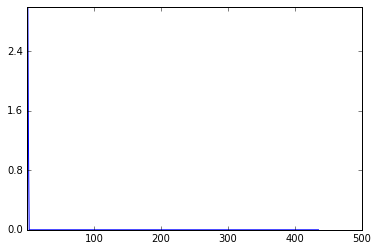

NameError: name 'feature_type' is not defined

In [17]:
feature_list = ['idtfv', 'VGG16', 'jointLocs','relativeAngle','quaternions']
dataset_path = '/home/yzhang/workspace/IncrementalClustering/cvpr_demo/IDT_RADL'
result_path = '/home/yzhang/workspace/IncrementalClustering/cvpr_demo/IDT_RADL'
cpt_time = []

## read the features from the file
filename = 'idt_drinkWaterS1R1_transpose.mat'

dataset = bnpy.data.XData.read_mat(os.path.join(dataset_path, filename))

## train DPMM using online algorithm
print '--- train DPMM'
time_start = time.time()
K1_trained_model, K1_info_dict = bnpy.run(
dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
output_path='/tmp/CUMMAD_DPMM/trymoves-K=1/',
doWriteStdOut=False,
nLap=30, nTask=1, nBatch=1,
sF=1e3, ECovMat='eye',
K=1, initname='randexamples',
moves='birth,merge,shuffle',
m_startLap=5, b_startLap=2, b_Kfresh=4)

## measure running time
eps = time.time()-time_start
cpt_time = np.append(cpt_time, eps)

## assign labels to samples (0-based cluster)
print '--- output results'
Q = K1_trained_model.calc_local_params(dataset)['E_log_soft_ev'] # time X dimension, matrix of encoded features
sample_labels = np.argmax(Q, axis=1)
plot_segmentation(sample_labels)

## save the sample labels to file
outfile = 'RochesterADL_S1R1_DPMM_SampleLabels.txt'
np.savetxt(os.path.join(result_path, outfile), sample_labels)

## save the encoded features to file
outfile2 = 'RochesterADL_S1R1_DPMM_SampleEncodings.txt'
np.savetxt(os.path.join(result_path, outfile2), Q)

print feature_type+':mean(runtime)=' + str(np.mean(cpt_time))

mean(runtime)=34.5368275881


['jointLocs', 'relativeAngle', 'quaternions']